# Lesson 7 - Parkinson PCR

## Author -


### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [1]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [3]:
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head().iloc[:,0:10]

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130


View the first ten columns of data, all numberical variables.

In [4]:
parkinsons_df.head().iloc[:,10:]

,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


View the rest of data, all numberical variables.

In [5]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

Shows all the column names(feature and target names) for the dataset

In [6]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# One-hot encode inputs
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))

# Get target and original x-matrix
y = parkinsons_df[target_label]
X = parkinsons_df[feature_labels]

DataFrame one-hot-expanded shape: (5875, 17)


In [7]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [8]:
# Scale all columns first

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).

#create a new dataframe to store scaled data
df_scaled = pd.DataFrame()

for i in feature_labels:
    df_scaled[i] = np.apply_along_axis(scale, 0, parkinsons_df[i])
# Create a scaled y-target.
df_scaled['total_UPDRS'] = np.apply_along_axis(scale, 0, parkinsons_df['total_UPDRS'])

x_scaled = df_scaled[feature_labels]
y_scaled = df_scaled['total_UPDRS']

In [9]:
df_scaled.shape

(5875, 17)

it has 17 columns, 16 of them are features, the left one is the target variable

In [10]:
# PCR!!
# It has 16 features, so we can have up to 16 PC. 
pca = PCA(16)
pca_result = pca.fit_transform (x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

Text(0, 0.5, 'Explained Variance')

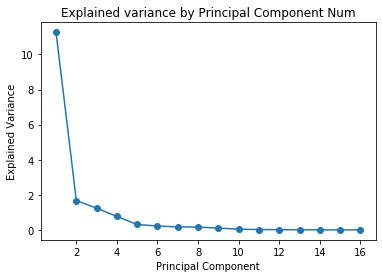

In [11]:
# Plot the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).

pca_exp_v = pca.explained_variance_
pc = np.arange(16)+1
plt.plot(pc, pca_exp_v, marker='o')
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     82.98
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.23e-68
Time:                        16:43:12   Log-Likelihood:                -8174.7
No. Observations:                5875   AIC:                         1.636e+04
Df Residuals:                    5870   BIC:                         1.639e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.543e-16      0.013   2.79e-14      1.0

Text(0.5, 1.0, 'Residual Histogram')

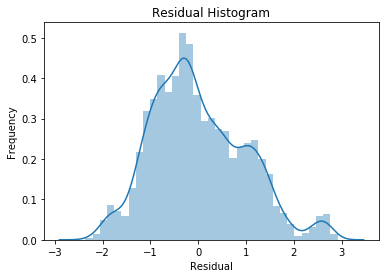

In [12]:
# Perform linear regression with the first N columns.

# PC4 looks like to be the elbow point in the above plot, so N =4 
n =4
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

The residual histogram is not a perfect normal distribution (but not bad), indicating that  this linear regression using 4 principle components is not a very good fit. A good regression model should give a normal distribution of residuals.

The summary table has one large value, which is for the intercept. Its confidence interval also includes zero, suggesting that it overfits. This is also accounted for the low r-squared and adjusted r-squared value. 

Summary of your results!

1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
    
    Number of components before is 16 because we have 16 features in our dataset. Number of components I chose is 4 because it is the elbow point in the plot.
    
    
2. Interpret the adjusted R-squared.
    
    Adjusted R-squared is the modified R-squared that is adjusted based on model parameters. The value of adj. R-sqaured should be between 0 and 1. The more it closes to 1, the better the model fits. In this case, adj. R-sqaured is based on the degree of freedom 3 (4 - 1), and is calculated to be 0.053, implying that the model does not fit well on the data.This is could be caused by the large p-value of the intercept.

